In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
raw = pd.read_csv(r"C:\Users\lionel\Documents\GitHub\StatisticsAndMachineLearning\Kaggle dataset\META.csv",
                  index_col=0,parse_dates=True)
raw.head()

C:\Users\lionel\AppData\Local\Temp\ipykernel_39432\3968635944.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  raw = pd.read_csv(r"C:\Users\lionel\Documents\GitHub\StatisticsAndMachineLearning\Kaggle dataset\META.csv",


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-28,312.989990,325.519989,308.109985,316.920013,316.584106,50806800
2021-10-29,320.190002,326.000000,319.600006,323.570007,323.227051,37059400
2021-11-01,326.040009,333.450012,326.000000,329.980011,329.630280,31518900
2021-11-02,331.380005,334.790009,323.799988,328.079987,327.732269,28353000
2021-11-03,327.489990,332.149994,323.200012,331.619995,331.268524,20786500


In [3]:
data = raw[["Adj Close","Volume"]]
data

,Adj Close,Volume
Date,,
2021-10-28,316.584106,50806800
2021-10-29,323.227051,37059400
2021-11-01,329.630280,31518900
2021-11-02,327.732269,28353000
2021-11-03,331.268524,20786500
...,...,...
2024-04-30,430.170013,18429500
2024-05-01,439.190002,20344900
2024-05-02,441.679993,15221300


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 633 entries, 2021-10-28 to 2024-05-06
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  633 non-null    float64
 1   Volume     633 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 14.8 KB


In [5]:



data["rets"] = np.log(data["Adj Close"]/data["Adj Close"].shift(1)) # log returns

data.dropna(inplace=True)

C:\Users\lionel\AppData\Local\Temp\ipykernel_39432\1171869710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["rets"] = np.log(data["Adj Close"]/data["Adj Close"].shift(1)) # log returns
C:\Users\lionel\AppData\Local\Temp\ipykernel_39432\1171869710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [6]:
data

,Adj Close,Volume,rets
Date,,,
2021-10-29,323.227051,37059400,0.020766
2021-11-01,329.630280,31518900,0.019617
2021-11-02,327.732269,28353000,-0.005775
2021-11-03,331.268524,20786500,0.010732
2021-11-04,335.494049,22495300,0.012675
...,...,...,...
2024-04-30,430.170013,18429500,-0.005679
2024-05-01,439.190002,20344900,0.020752
2024-05-02,441.679993,15221300,0.005653


In [7]:
data["direction"] = np.sign(data["rets"]).astype(int)

C:\Users\lionel\AppData\Local\Temp\ipykernel_39432\1141322508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["direction"] = np.sign(data["rets"]).astype(int)


In [8]:
data

,Adj Close,Volume,rets,direction
Date,,,,
2021-10-29,323.227051,37059400,0.020766,1
2021-11-01,329.630280,31518900,0.019617,1
2021-11-02,327.732269,28353000,-0.005775,-1
2021-11-03,331.268524,20786500,0.010732,1
2021-11-04,335.494049,22495300,0.012675,1
...,...,...,...,...
2024-04-30,430.170013,18429500,-0.005679,-1
2024-05-01,439.190002,20344900,0.020752,1
2024-05-02,441.679993,15221300,0.005653,1


In [9]:
data["lag_1"] = data["rets"].shift(1)
data["lag_2"] = data["rets"].shift(2)
data.dropna(inplace=True)

C:\Users\lionel\AppData\Local\Temp\ipykernel_39432\2523328610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lag_1"] = data["rets"].shift(1)
C:\Users\lionel\AppData\Local\Temp\ipykernel_39432\2523328610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lag_2"] = data["rets"].shift(2)
C:\Users\lionel\AppData\Local\Temp\ipykernel_39432\2523328610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

In [10]:
data

,Adj Close,Volume,rets,direction,lag_1,lag_2
Date,,,,,,
2021-11-02,327.732269,28353000,-0.005775,-1,0.019617,0.020766
2021-11-03,331.268524,20786500,0.010732,1,-0.005775,0.019617
2021-11-04,335.494049,22495300,0.012675,1,0.010732,-0.005775
2021-11-05,340.768433,26872800,0.015599,1,0.012675,0.010732
2021-11-08,338.261108,18342500,-0.007385,-1,0.015599,0.012675
...,...,...,...,...,...,...
2024-04-30,430.170013,18429500,-0.005679,-1,-0.024364,0.004318
2024-05-01,439.190002,20344900,0.020752,1,-0.005679,-0.024364
2024-05-02,441.679993,15221300,0.005653,1,0.020752,-0.005679


In [11]:
X = data[["lag_1","lag_2","Volume"]]
y = data["direction"]
train_test_split(X,y,test_size=0.2,random_state=42)

[               lag_1     lag_2    Volume
 Date                                    
 2023-03-06  0.059610  0.006380  33209400
 2021-11-10 -0.009644 -0.007385  21872600
 2022-04-01 -0.024390 -0.008783  19544800
 2022-04-18 -0.022627  0.003962  16580800
 2023-12-15 -0.004701  0.001555  30001600
 ...              ...       ...       ...
 2022-02-14 -0.038073 -0.017085  38184000
 2022-04-05  0.039417  0.011136  29727200
 2022-11-29 -0.023890 -0.007422  23899200
 2023-07-28  0.043069  0.013827  39220300
 2022-03-30  0.027656  0.007948  25588000
 
 [504 rows x 3 columns],
                lag_1     lag_2    Volume
 Date                                    
 2023-10-25 -0.004660  0.017217  42192500
 2022-10-21 -0.012842  0.003233  46348600
 2024-01-16  0.012954 -0.002162  15306900
 2022-09-08  0.011601 -0.011165  22530800
 2024-01-10 -0.003435  0.018886  22117200
 ...              ...       ...       ...
 2023-05-19  0.017820  0.015250  21599800
 2023-02-14  0.029868 -0.021417  24034600
 2022-0

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_test,y_test

(               lag_1     lag_2    Volume
 Date                                    
 2023-10-25 -0.004660  0.017217  42192500
 2022-10-21 -0.012842  0.003233  46348600
 2024-01-16  0.012954 -0.002162  15306900
 2022-09-08  0.011601 -0.011165  22530800
 2024-01-10 -0.003435  0.018886  22117200
 ...              ...       ...       ...
 2023-05-19  0.017820  0.015250  21599800
 2023-02-14  0.029868 -0.021417  24034600
 2022-09-15 -0.010900 -0.098375  34606300
 2023-09-06  0.012640  0.001655  15418100
 2023-11-14  0.001277  0.025320  17179400
 
 [126 rows x 3 columns],
 Date
 2023-10-25   -1
 2022-10-21   -1
 2024-01-16   -1
 2022-09-08    1
 2024-01-10    1
              ..
 2023-05-19   -1
 2023-02-14    1
 2022-09-15   -1
 2023-09-06   -1
 2023-11-14    1
 Name: direction, Length: 126, dtype: int32)

In [13]:
model = LogisticRegression(C=1)
pred = model.fit(X_train,y_train).predict(X_test)
pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,pred)
accuracy

0.48412698412698413

<Axes: xlabel='Date'>

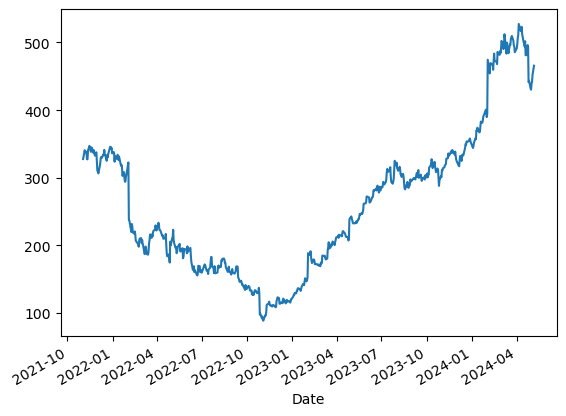

In [15]:
data["Adj Close"].plot()

Use of textbook example on meta returns

Similarly we want to predict the direction of the market

In [20]:
df = raw[["Adj Close","Volume"]]
df["rets"] = np.log(df["Adj Close"]/df["Adj Close"].shift(1)) #log returns
df

C:\Users\lionel\AppData\Local\Temp\ipykernel_39432\2211529364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rets"] = np.log(df["Adj Close"]/df["Adj Close"].shift(1)) #log returns


,Adj Close,Volume,rets
Date,,,
2021-10-28,316.584106,50806800,NaN
2021-10-29,323.227051,37059400,0.020766
2021-11-01,329.630280,31518900,0.019617
2021-11-02,327.732269,28353000,-0.005775
2021-11-03,331.268524,20786500,0.010732
...,...,...,...
2024-04-30,430.170013,18429500,-0.005679
2024-05-01,439.190002,20344900,0.020752
2024-05-02,441.679993,15221300,0.005653


In [22]:
for i in range(1,6,1):
    df["lag_" + str(i)] = df["rets"].shift(i)
    
df

,Adj Close,Volume,rets,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,,,
2021-10-28,316.584106,50806800,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-29,323.227051,37059400,0.020766,NaN,NaN,NaN,NaN,NaN
2021-11-01,329.630280,31518900,0.019617,0.020766,NaN,NaN,NaN,NaN
2021-11-02,327.732269,28353000,-0.005775,0.019617,0.020766,NaN,NaN,NaN
2021-11-03,331.268524,20786500,0.010732,-0.005775,0.019617,0.020766,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-04-30,430.170013,18429500,-0.005679,-0.024364,0.004318,-0.111617,-0.005255,0.029394
2024-05-01,439.190002,20344900,0.020752,-0.005679,-0.024364,0.004318,-0.111617,-0.005255
2024-05-02,441.679993,15221300,0.005653,0.020752,-0.005679,-0.024364,0.004318,-0.111617


In [23]:
df.dropna(inplace=True)
df["direction"] = np.sign(df['rets'])
df

,Adj Close,Volume,rets,lag_1,lag_2,lag_3,lag_4,lag_5,direction
Date,,,,,,,,,
2021-11-05,340.768433,26872800,0.015599,0.012675,0.010732,-0.005775,0.019617,0.020766,1.0
2021-11-08,338.261108,18342500,-0.007385,0.015599,0.012675,0.010732,-0.005775,0.019617,-1.0
2021-11-09,335.014526,17556700,-0.009644,-0.007385,0.015599,0.012675,0.010732,-0.005775,-1.0
2021-11-10,327.292755,21872600,-0.023319,-0.009644,-0.007385,0.015599,0.012675,0.010732,-1.0
2021-11-11,327.392609,12376600,0.000305,-0.023319,-0.009644,-0.007385,0.015599,0.012675,1.0
...,...,...,...,...,...,...,...,...,...
2024-04-30,430.170013,18429500,-0.005679,-0.024364,0.004318,-0.111617,-0.005255,0.029394,-1.0
2024-05-01,439.190002,20344900,0.020752,-0.005679,-0.024364,0.004318,-0.111617,-0.005255,1.0
2024-05-02,441.679993,15221300,0.005653,0.020752,-0.005679,-0.024364,0.004318,-0.111617,1.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 627 entries, 2021-11-05 to 2024-05-06
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  627 non-null    float64
 1   Volume     627 non-null    int64  
 2   rets       627 non-null    float64
 3   lag_1      627 non-null    float64
 4   lag_2      627 non-null    float64
 5   lag_3      627 non-null    float64
 6   lag_4      627 non-null    float64
 7   lag_5      627 non-null    float64
 8   direction  627 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 49.0 KB


In [27]:
df.astype({'direction':'int32'})
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 627 entries, 2021-11-05 to 2024-05-06
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  627 non-null    float64
 1   Volume     627 non-null    int64  
 2   rets       627 non-null    float64
 3   lag_1      627 non-null    float64
 4   lag_2      627 non-null    float64
 5   lag_3      627 non-null    float64
 6   lag_4      627 non-null    float64
 7   lag_5      627 non-null    float64
 8   direction  627 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 49.0 KB


In [28]:
#above didnt work. perhaps it will only change if we state all columns in the dictionary
df["direction"] = np.sign(df['rets']).astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 627 entries, 2021-11-05 to 2024-05-06
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  627 non-null    float64
 1   Volume     627 non-null    int64  
 2   rets       627 non-null    float64
 3   lag_1      627 non-null    float64
 4   lag_2      627 non-null    float64
 5   lag_3      627 non-null    float64
 6   lag_4      627 non-null    float64
 7   lag_5      627 non-null    float64
 8   direction  627 non-null    int32  
dtypes: float64(7), int32(1), int64(1)
memory usage: 46.5 KB


In [30]:
data.describe()

,Adj Close,Volume,rets,direction,lag_1,lag_2,lag_3,lag_4,lag_5
count,630.000000,6.300000e+02,630.000000,630.000000,630.000000,630.000000,627.000000,626.000000,625.000000
mean,260.764734,2.765639e+07,0.000548,0.017460,0.000532,0.000529,0.000458,0.000425,0.000435
std,107.504924,1.902301e+07,0.033136,0.999847,0.033124,0.033121,0.033181,0.033198,0.033224
min,88.815765,5.467500e+06,-0.306391,-1.000000,-0.306391,-0.306391,-0.306391,-0.306391,-0.306391
25%,172.831630,1.771898e+07,-0.012491,-1.000000,-0.012491,-0.012491,-0.012605,-0.012657,-0.012708
50%,237.173356,2.300260e+07,0.000433,1.000000,0.000433,0.000433,0.000305,0.000292,0.000305
75%,327.170379,3.131900e+07,0.015317,1.000000,0.015317,0.015317,0.015275,0.015249,0.015250
max,527.340027,2.323166e+08,0.209307,1.000000,0.209307,0.209307,0.209307,0.209307,0.209307


In [32]:
df.size

5643

In [33]:
data.corr()

,Adj Close,Volume,rets,direction,lag_1,lag_2,lag_3,lag_4,lag_5
Adj Close,1.000000,-0.376885,0.054914,0.032779,0.051358,0.048049,0.046038,0.043629,0.042302
Volume,-0.376885,1.000000,-0.156761,-0.020988,-0.093114,-0.066133,-0.105704,-0.094210,-0.065781
rets,0.054914,-0.156761,1.000000,0.628525,-0.002180,-0.005857,-0.014341,-0.011860,-0.014629
direction,0.032779,-0.020988,0.628525,1.000000,-0.024766,0.002960,0.035754,-0.028068,-0.013300
lag_1,0.051358,-0.093114,-0.002180,-0.024766,1.000000,-0.002578,-0.006183,-0.015221,-0.011607
lag_2,0.048049,-0.066133,-0.005857,0.002960,-0.002578,1.000000,-0.003138,-0.006851,-0.015027
lag_3,0.046038,-0.105704,-0.014341,0.035754,-0.006183,-0.003138,1.000000,-0.003291,-0.006806
lag_4,0.043629,-0.094210,-0.011860,-0.028068,-0.015221,-0.006851,-0.003291,1.000000,-0.003112
lag_5,0.042302,-0.065781,-0.014629,-0.013300,-0.011607,-0.015027,-0.006806,-0.003112,1.000000


In [ ]:
# we expect that the correlations between the lag variables and rets are close to 0. 
# there is little correlation between returns of previous days.

In [1]:
data

NameError: name 'data' is not defined